<a href="https://colab.research.google.com/github/Vilvaa/pythonProjectsData/blob/main/Python_Data_Science_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Linear Regression Using Python <h1>


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics

dataset = pd.read_excel("SampleDatafrom232Tut1Fix.xlsx")
dataset.head()
dataset.drop([0])


x = [dataset['NKE']]
y = [dataset['S&P 500']]

lr = LinearRegression()

lr.fit(x,y)



<h1> Graphing Scatter Plots using Matplotlib.pyplot + Line of best fit <h1>

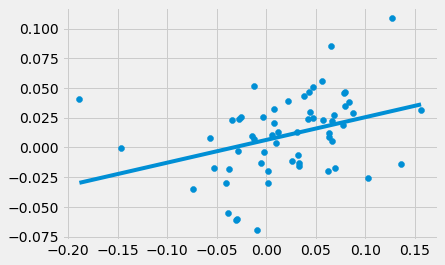

In [ ]:
import matplotlib.pyplot as pyplot
import pandas
import numpy

pyplot.style.use("fivethirtyeight")

dataFrame = pandas.read_excel("SampleDatafrom232Tut1Fix.xlsx")

x = dataFrame['NKE']
y = dataFrame['S&P 500']
pyplot.scatter(x,y)
pyplot.plot(numpy.unique(x), numpy.poly1d(numpy.polyfit(x,y,1))(np.unique(x)))

<h1> Example of matplotlib.pyplot using 'FiveThirtyEight' style <h1>

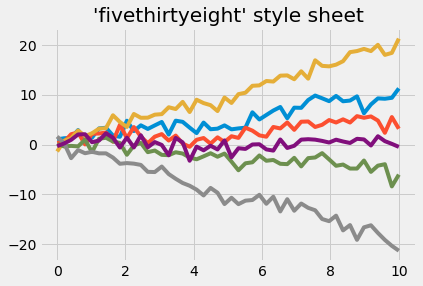

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('fivethirtyeight')

x = np.linspace(0, 10)

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

ax.plot(x, np.sin(x) + x + np.random.randn(50))
ax.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + np.random.randn(50))
ax.set_title("'fivethirtyeight' style sheet")

plt.show()

# Python Algorithmic Trading tutorial

<h1> Python Algorithmic trading <h1>

In [ ]:
# Description : using dual moving average crossover to determine when to buy/sell stocks

In [ ]:
# Import Dependencies

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Store the data
AAPL = pd.read_csv('AAPL.csv')
#Show data
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-19,24.602501,24.662500,23.875000,24.165001,22.388184,212350800
1,2016-01-20,23.775000,24.547501,23.355000,24.197500,22.418295,289337600
2,2016-01-21,24.264999,24.469999,23.735001,24.075001,22.304800,208646000
3,2016-01-22,24.657499,25.365000,24.592501,25.355000,23.490686,263202000
4,2016-01-25,25.379999,25.382500,24.802500,24.860001,23.032082,207178000
...,...,...,...,...,...,...,...
1254,2021-01-11,129.190002,130.169998,128.500000,128.979996,128.979996,100620900
1255,2021-01-12,128.500000,129.690002,126.860001,128.800003,128.800003,91951100
1256,2021-01-13,128.759995,131.449997,128.490005,130.889999,130.889999,88636800
1257,2021-01-14,130.800003,131.000000,128.759995,128.910004,128.910004,90221800


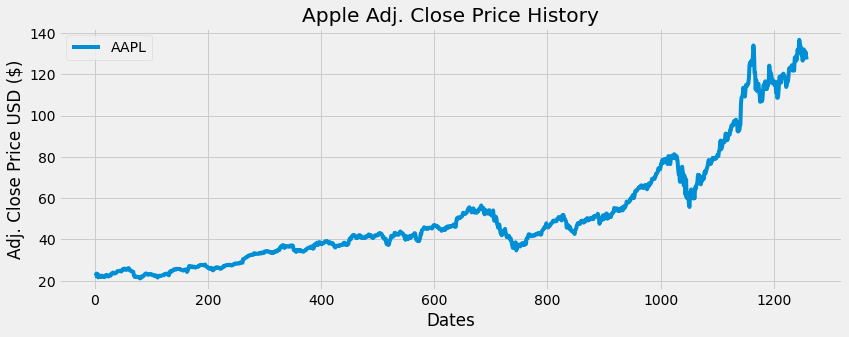

In [ ]:
#Visualize the data
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Dates')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Create the simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close Price'] = AAPL['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1254,127.166667
1255,127.573667
1256,127.968333
1257,128.174667


In [ ]:
# Create a simple moving average 100 days
SMA100 = pd.DataFrame()
SMA100['Adj Close Price'] = AAPL['Adj Close'].rolling(window = 100).mean()
SMA100

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1254,119.977404
1255,120.110322
1256,120.238509
1257,120.286051


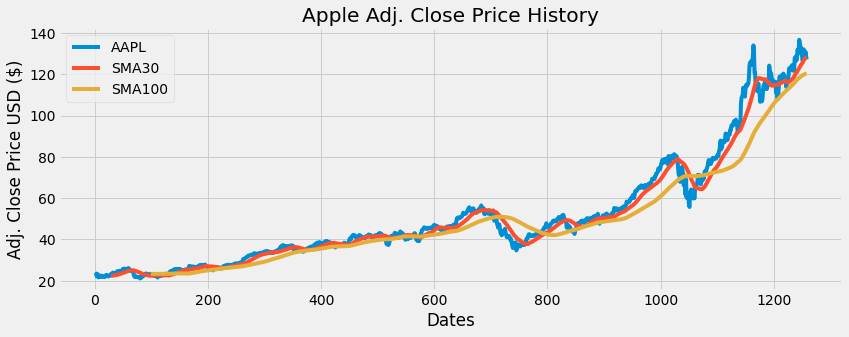

In [ ]:
#Visualize the data
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close Price'], label= 'SMA30')
plt.plot(SMA100['Adj Close Price'], label= 'SMA100')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Dates')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Create a new data frame to store all the data
data = pd.DataFrame()
data['AAPL'] = AAPL['Adj Close']
data['SMA30'] = SMA30['Adj Close Price']
data['SMA100'] = SMA100['Adj Close Price']

In [ ]:
#Create function to signal buy sell
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['AAPL'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)

In [ ]:
#Store the buy and sell data into a var
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

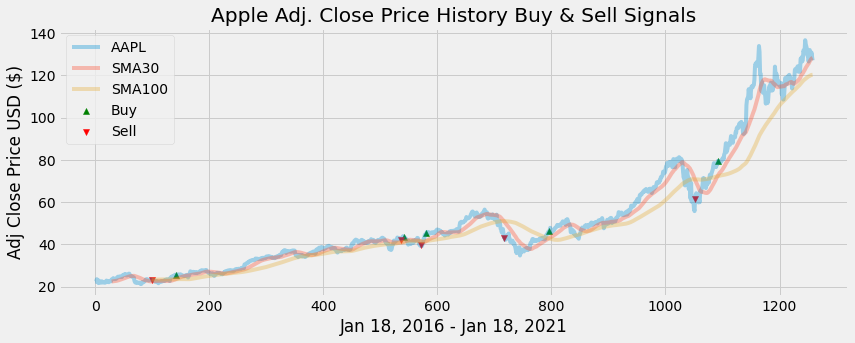

In [ ]:
#Visualize the data and the strategy to buy/sell the stock
plt.figure(figsize=(12.6,4.6))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA30'], label='SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title("Apple Adj. Close Price History Buy & Sell Signals")
plt.xlabel('Jan 18, 2016 - Jan 18, 2021')
plt.ylabel("Adj Close Price USD ($)")
plt.legend(loc = 'upper left')
plt.show()